In [1]:

import pandas as pd
from datetime import date, datetime
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

In [2]:
#provide the data location
df = pd.read_csv(r'/mnt/c/Users/josem/Downloads/UofT/team_project/data/new_retail_data.csv')


In [3]:
# Data Selection
df = df[['Transaction_ID','Customer_ID','City', 'State','Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products']]

In [4]:
# Display the first five rows of the selected columns
print(df.head(10))


   Transaction_ID  Customer_ID        City            State    Country   Age  Gender  Income  \
0       8691788.0      37249.0    Dortmund           Berlin    Germany  21.0    Male     Low   
1       2174773.0      69749.0  Nottingham          England         UK  19.0  Female     Low   
2       6679610.0      30192.0     Geelong  New South Wales  Australia  48.0    Male     Low   
3       7232460.0      62101.0    Edmonton          Ontario     Canada  56.0    Male    High   
4       4983775.0      27901.0     Bristol          England         UK  22.0    Male     Low   
5       6095326.0      41289.0    Brisbane  New South Wales  Australia  58.0  Female  Medium   
6       5434096.0      97285.0   Kitchener          Ontario     Canada  29.0  Female     Low   
7       2344675.0      26603.0      Munich           Berlin    Germany  29.0    Male  Medium   
8       4155845.0      80175.0  Wollongong  New South Wales  Australia  46.0    Male  Medium   
9       4926148.0      31878.0     Colog

In [5]:
df.shape

(302010, 25)

In [6]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Convert the 'Date' column to datetime
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%m/%d/%Y')

# Create a new column for year and month as integer
df_cleaned['yearmonth'] = df_cleaned['Date'].dt.year * 100 + df_cleaned['Date'].dt.month

# Rename the 'Date' column to 'yearmonthday'
df_cleaned.rename(columns={'Date': 'yearmonthday'}, inplace=True)

# Display the first three rows
df_cleaned.head(5)


,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,yearmonthday,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,yearmonth
0,8691788.0,37249.0,Dortmund,Berlin,Germany,21.0,Male,Low,Regular,2023-09-18,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts,202309
1,2174773.0,69749.0,Nottingham,England,UK,19.0,Female,Low,Premium,2023-12-31,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab,202312
2,6679610.0,30192.0,Geelong,New South Wales,Australia,48.0,Male,Low,Regular,2023-04-26,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment,202304
3,7232460.0,62101.0,Edmonton,Ontario,Canada,56.0,Male,High,Premium,2023-05-08,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife,202305
4,4983775.0,27901.0,Bristol,England,UK,22.0,Male,Low,Premium,2024-01-10,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies,202401


In [7]:
df_cleaned.shape

(295617, 26)

In [8]:
# Define categorical columns
cat_columns = [
    'City', 'State', 'Country', 'Gender', 'Income', 'Customer_Segment',
    'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback',
    'Shipping_Method', 'Payment_Method', 'Order_Status', 'products'
]

# Define date-related columns
date_columns = [
    'Transaction_Date', 'Year', 'Month', 'Time', 'yearmonth', 'yearmonthday'
]

# Identify quantitative columns
quan_columns = [col for col in df_cleaned.columns if col not in cat_columns and col not in date_columns]

# Display categorized columns
print("Categorical Columns:", cat_columns)
print("Date Columns:", date_columns)
print("Quantitative Columns:", quan_columns)



Categorical Columns: ['City', 'State', 'Country', 'Gender', 'Income', 'Customer_Segment', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'products']
Date Columns: ['Transaction_Date', 'Year', 'Month', 'Time', 'yearmonth', 'yearmonthday']
Quantitative Columns: ['Transaction_ID', 'Customer_ID', 'Age', 'Total_Purchases', 'Amount', 'Total_Amount', 'Ratings']


In [9]:
# Count of unique values of categorical columns using a dictionary comprehension
unique_counts = {col: df_cleaned[col].nunique() for col in cat_columns}
for col, count in unique_counts.items():
    print(f"{col}: {count}")

# Unique Values of some columns using a list comprehension
unique_values = {col: df_cleaned[col].unique() for col in cat_columns if df_cleaned[col].nunique() < 6}
for col, values in unique_values.items():
    print(f"{col}: {values}")

City: 130
State: 54
Country: 5
Gender: 2
Income: 3
Customer_Segment: 3
Product_Category: 5
Product_Brand: 18
Product_Type: 33
Feedback: 4
Shipping_Method: 3
Payment_Method: 4
Order_Status: 4
products: 318
Country: ['Germany' 'UK' 'Australia' 'Canada' 'USA']
Gender: ['Male' 'Female']
Income: ['Low' 'High' 'Medium']
Customer_Segment: ['Regular' 'Premium' 'New']
Product_Category: ['Clothing' 'Electronics' 'Books' 'Home Decor' 'Grocery']
Feedback: ['Excellent' 'Average' 'Bad' 'Good']
Shipping_Method: ['Same-Day' 'Standard' 'Express']
Payment_Method: ['Debit Card' 'Credit Card' 'PayPal' 'Cash']
Order_Status: ['Shipped' 'Processing' 'Pending' 'Delivered']


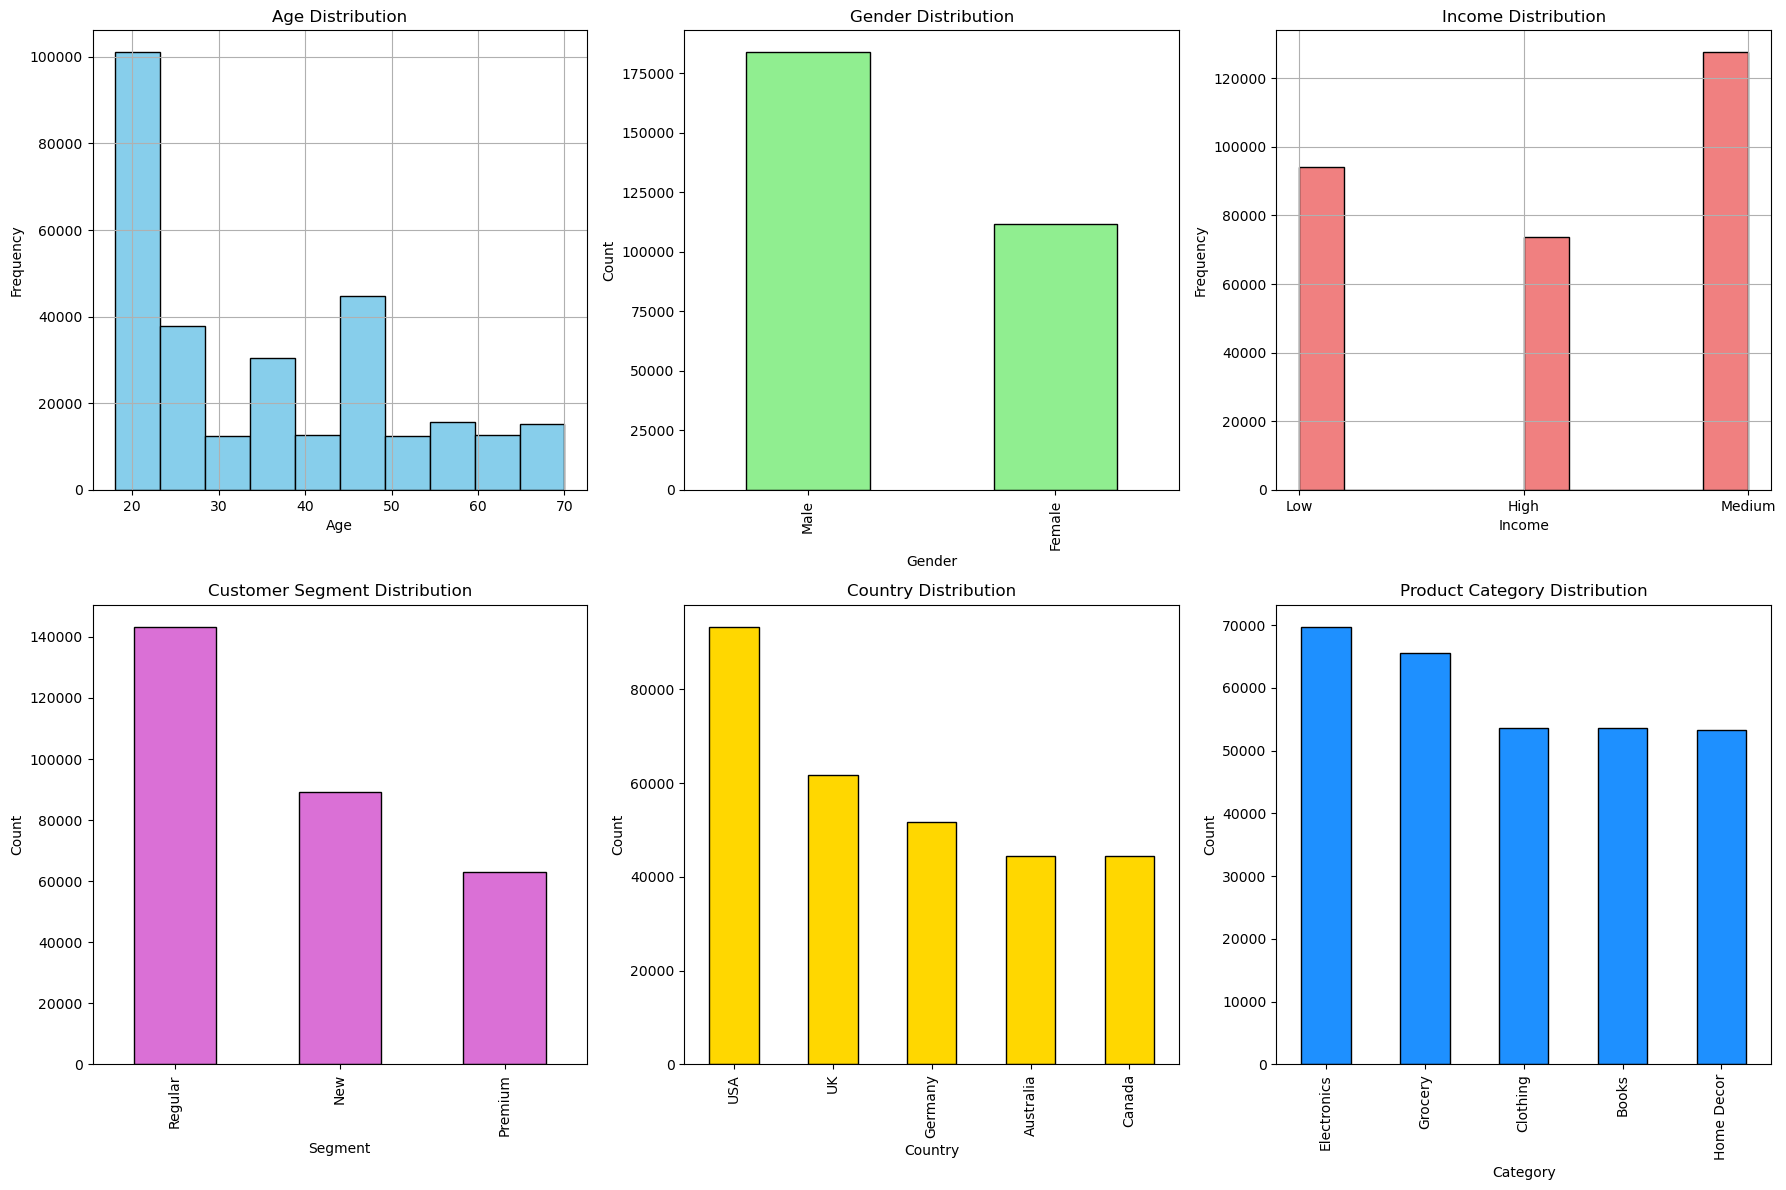

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(18, 12))

# 1. Age Distribution
plt.subplot(2, 3, 1)
df_cleaned['Age'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 2. Gender Distribution
plt.subplot(2, 3, 2)
df_cleaned['Gender'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# 3. Income Distribution
plt.subplot(2, 3, 3)
df_cleaned['Income'].hist(bins=10, color='lightcoral', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# 4. Customer Segment
plt.subplot(2, 3, 4)
df_cleaned['Customer_Segment'].value_counts().plot(kind='bar', color='orchid', edgecolor='black')
plt.title('Customer Segment Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')

# 5. Country Distribution
plt.subplot(2, 3, 5)
df_cleaned['Country'].value_counts().plot(kind='bar', color='gold', edgecolor='black')
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')

# 6. Product Category
plt.subplot(2, 3, 6)
df_cleaned['Product_Category'].value_counts().plot(kind='bar', color='dodgerblue', edgecolor='black')
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


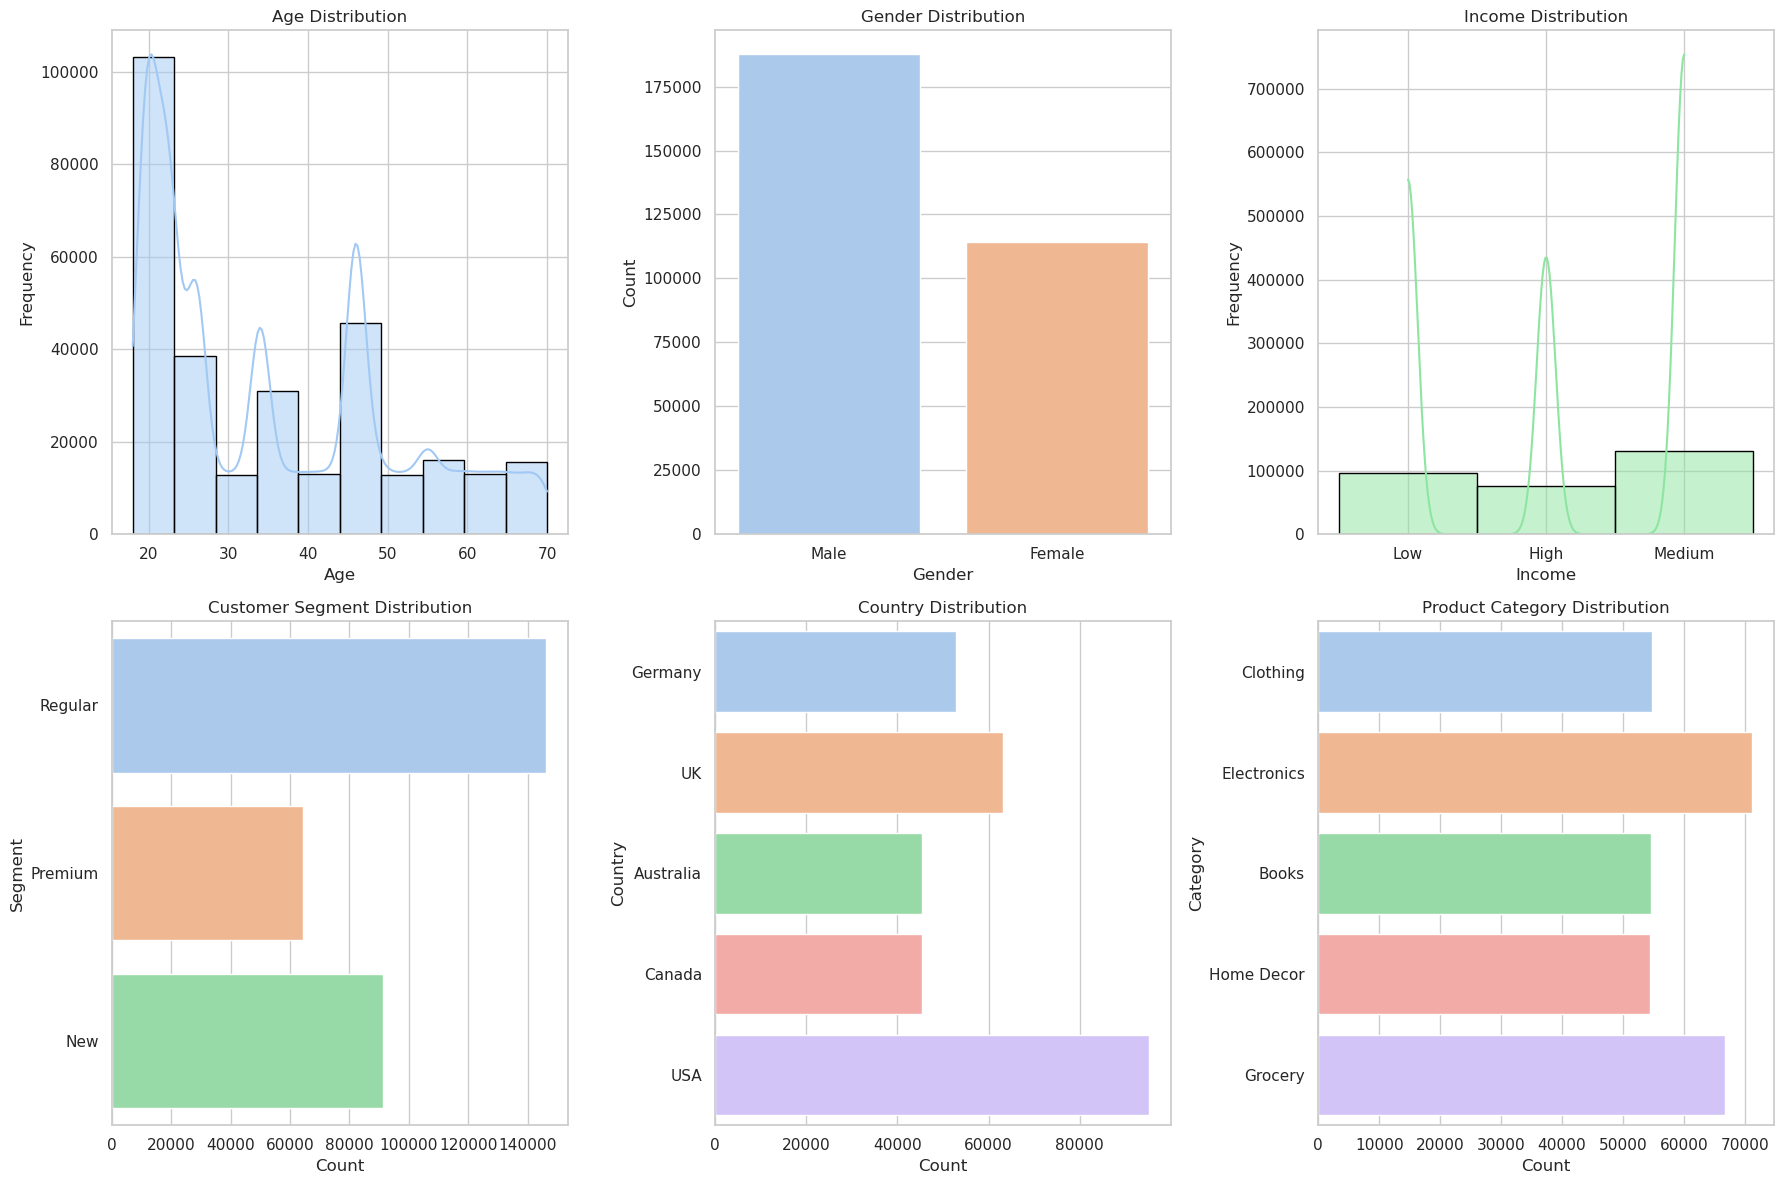

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set a style for the plots
sns.set(style="whitegrid")

# Define a color palette
palette = sns.color_palette("pastel")

plt.figure(figsize=(18, 12))

# 1. Age Distribution
plt.subplot(2, 3, 1)
sns.histplot(df['Age'], bins=10, kde=True, color=palette[0], edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 2. Gender Distribution
plt.subplot(2, 3, 2)
sns.countplot(x='Gender', data=df, palette=palette)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# 3. Income Distribution
plt.subplot(2, 3, 3)
sns.histplot(df['Income'], bins=10, kde=True, color=palette[2], edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

# 4. Customer Segment
plt.subplot(2, 3, 4)
sns.countplot(y='Customer_Segment', data=df, palette=palette)
plt.title('Customer Segment Distribution')
plt.xlabel('Count')
plt.ylabel('Segment')

# 5. Country Distribution
plt.subplot(2, 3, 5)
sns.countplot(y='Country', data=df, palette=palette)
plt.title('Country Distribution')
plt.xlabel('Count')
plt.ylabel('Country')

# 6. Product Category
plt.subplot(2, 3, 6)
sns.countplot(y='Product_Category', data=df, palette=palette)
plt.title('Product Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')

plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model_data = df_cleaned

# Encode categorical variables
label_encoders = {}
# for column in ['Gender', 'Income', 'Product_Category', 'Product_Brand','City','Product_Type']:
for column in cat_columns:
    le = LabelEncoder()
    model_data[column] = le.fit_transform(model_data[column])
    label_encoders[column] = le

# Standardize numerical features
scaler = StandardScaler()
model_data[quan_columns] = scaler.fit_transform(model_data[quan_columns])

df_cleaned.head(5)


,Transaction_ID,Customer_ID,City,State,Country,Age,Gender,Income,Customer_Segment,yearmonthday,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,yearmonth,Age_bin
0,1.231929,-0.683118,35,4,2,-0.963242,1,1,2,2023-09-18,2023.0,September,22:03:55,-0.822819,-1.040485,-0.924469,1,10,23,2,1,2,3,1.391396,86,202309,"(17.948, 23.2]"
1,-1.278621,0.566348,87,9,3,-1.096402,0,1,1,2023-12-31,2023.0,December,8:42:04,-1.171458,1.048250,-0.496912,2,14,28,2,2,1,2,0.634218,164,202312,"(17.948, 23.2]"
2,0.456778,-0.954425,46,33,0,0.834419,1,1,2,2023-04-26,2023.0,April,4:06:29,-0.822819,0.702564,-0.269479,0,11,3,0,1,1,2,-0.880138,268,202304,"(44.0, 49.2]"
3,0.669752,0.272320,40,39,1,1.367060,1,0,1,2023-05-08,2023.0,May,14:55:17,0.571736,0.687924,0.973817,4,6,31,2,2,3,2,0.634218,301,202305,"(54.4, 59.6]"
4,-0.196509,-1.042503,20,9,3,-0.896662,1,1,1,2024-01-10,2024.0,January,16:54:07,-1.171458,-0.925570,-0.991384,3,9,4,1,2,0,3,-1.637316,58,202401,"(17.948, 23.2]"


In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming df_cleaned is your DataFrame
model_data = df_cleaned.copy()

# Define categorical and quantitative columns
cat_columns = ['Gender', 'Income', 'Product_Category', 'Country']  # Ensure these columns are correct
quan_columns = ['Total_Amount', 'Age']  # Include the correct quantitative columns

# Encode categorical variables using a function for reusability
def encode_categorical(df, columns):
    for column in columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
    return df

# Standardize numerical features using a function for reusability
def standardize_numerical(df, columns):
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

# Apply encoding and standardization
model_data = encode_categorical(model_data, cat_columns)
model_data = standardize_numerical(model_data, quan_columns)

# Select features for clustering
features = cat_columns + quan_columns  # Combine both lists of columns

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
model_data['Cluster'] = kmeans.fit_predict(model_data[features])

# Features and target
X = model_data[features]
y = model_data['Cluster']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Assuming X and y are already defined
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with a standard scaler and KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('knn', KNeighborsClassifier())  # KNN classifier
])

# Define hyperparameters for grid search
param_grid = {
    'knn__n_neighbors': [3, 4, 5, 6, 7, 9],  # Number of neighbors
    'knn__weights': ['uniform', 'distance']  # Weight function used in prediction
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_knn = grid_search.best_estimator_

# Predict and evaluate on the test set
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Output the best parameters and accuracy
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy:.2f}')


Best parameters: {'knn__n_neighbors': 7, 'knn__weights': 'distance'}
Accuracy: 1.00


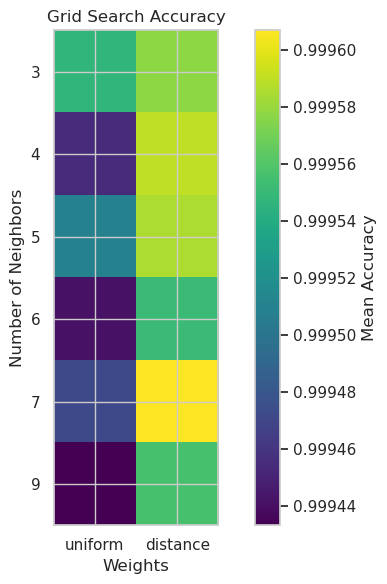

In [25]:
# Plot the grid search results
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

# Create a grid for plotting
n_neighbors = param_grid['knn__n_neighbors']
weights = param_grid['knn__weights']

# Reshape mean_test_scores into a matrix for plotting
scores_matrix = np.array(mean_test_scores).reshape(len(n_neighbors), len(weights))


# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(scores_matrix, interpolation='nearest', cmap='viridis')
plt.title('Grid Search Accuracy')
plt.xlabel('Weights')
plt.ylabel('Number of Neighbors')
plt.colorbar(label='Mean Accuracy')

# Set x and y ticks with corresponding labels
plt.xticks(np.arange(len(weights)), weights)
plt.yticks(np.arange(len(n_neighbors)), n_neighbors)

plt.tight_layout()
plt.show()

Mean Absolute Error (MAE): 0.71
Mean Squared Error (MSE): 1.02
Root Mean Squared Error (RMSE): 1.01
R-squared (R2): 0.26


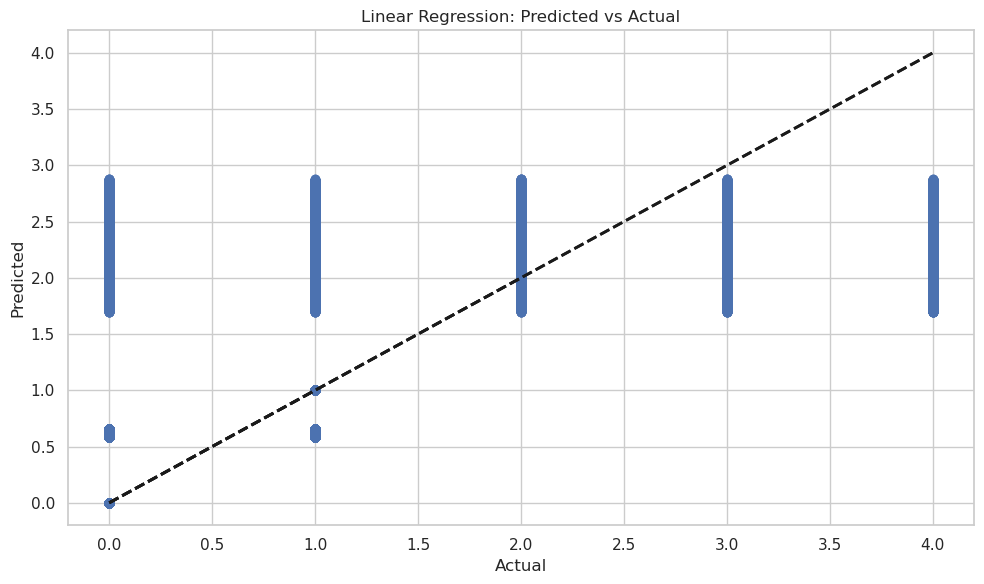

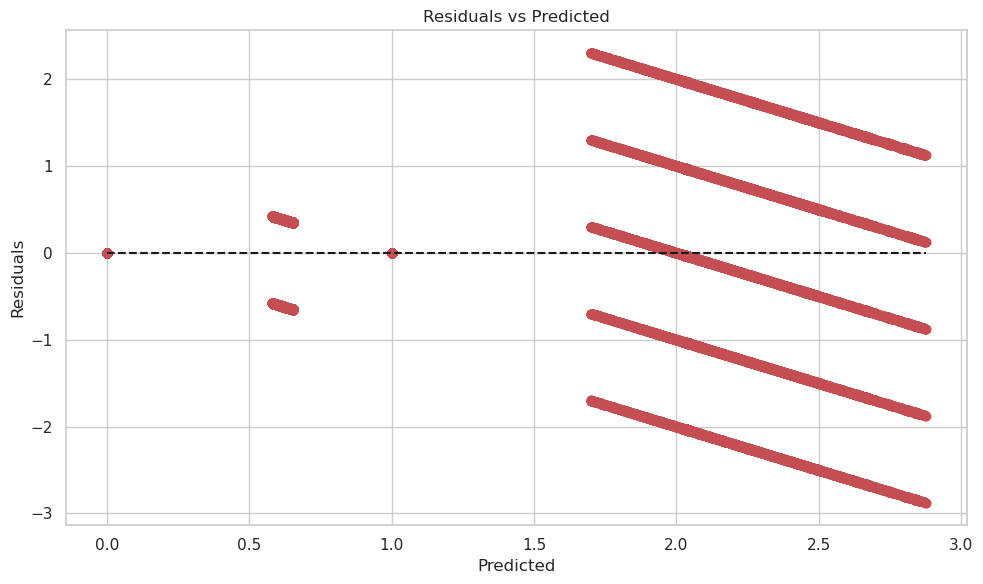

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

target_column = ['Gender', 'Income', 'Product_Category', 'Country']  # Ensure these columns are correct
features = ['Age', 'Income', 'Total_Amount']  # Include relevant feature columns

# Prepare the data
X = df_cleaned[features]
y = df_cleaned[target_column]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Predicted vs Actual')
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='r')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='k', linestyles='dashed')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()
